### Preprocessing Flood Warning Data

This notebook prepares flood warning data by:
- Loading flood warning alerts and area geometries;
- Filtering and merging based on relevant warning areas (with optional steps that can be added for spatial matching);
- Selecting a specific warning area;
- Modifying warnings messages to retain only start/stop events;
- Creating a continuous hourly indicator for flood warnings;
- Saving the processed dataset for downstream analysis.

In [0]:
#Import modules and libraries.
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [0]:
#Load the data.
warnings_df = pd.read_excel(os.path.join("Data", "20250123_FW Issued_EA.xlsx"))
warnings_df

,TA Code,TA Name,TA Owner,Message Set Name,Message Type,Approved
0,122WAC954,North Sea Coast at Bridlington,Yorkshire - North and East,122 Update Flood Alert EA,Update Flood Alert,2017-04-11 09:34:27.800
1,122WAC954,North Sea Coast at Bridlington,Yorkshire - North and East,122 Remove Flood Alert EA,Remove Flood Alert,2017-04-13 11:17:08.801
2,122WAC954,North Sea Coast at Bridlington,Yorkshire - North and East,122 Issue Flood Alert EA,Flood Alert,2017-04-14 14:39:16.982
3,122WAC954,North Sea Coast at Bridlington,Yorkshire - North and East,122 Update Flood Alert EA,Update Flood Alert,2017-04-14 14:48:38.825
4,122WAC954,North Sea Coast at Bridlington,Yorkshire - North and East,122 Remove Flood Alert EA,Remove Flood Alert,2017-04-16 12:58:58.639
...,...,...,...,...,...,...
77522,113WABTW15,South Devon Rivers,Devon and Cornwall - Devon,113 Issue Flood Alert EA,Flood Alert,2025-01-23 15:47:00.220
77523,113WABTW14,River Dart area,Devon and Cornwall - Devon,113 Issue Flood Alert EA,Flood Alert,2025-01-23 15:47:00.419
77524,113WABTW08,"Rivers Otter and Sid, and Exmouth area",Devon and Cornwall - Devon,113 Issue Flood Alert EA,Flood Alert,2025-01-23 15:47:00.602
77525,113WAFTW13,River Teign area,Devon and Cornwall - Devon,113 Issue Flood Alert EA,Flood Alert,2025-01-23 15:47:00.826


In [0]:
#This dataset is typically used to merge flood warnings with geographic data for spatial searches (e.g., finding warning areas within 5km of a postcode), but those steps are not included in this script, so `warningareas` is not required here but is included as it does not effect the results of the script.
warningareas = gpd.read_file("/dbfs/mnt/lab/unrestricted/luke.male@environment-agency.gov.uk/Flood_Warning_Areas.json")

warningareas

,id,area,fws_tacode,ta_name,descrip,la_name,parent,qdial,river_sea,gdb_geomattr_data,geometry
0,Flood_Warning_Areas.1,Wessex,111FWFBRT150,"River Brit at Riverside and George Street, Wes...","Riverside, and George Street, West Bay",Dorset Council,111WAFWDRS,166167,River Brit,None,"MULTIPOLYGON (((-2.76491 50.71287, -2.76488 50..."
1,Flood_Warning_Areas.2,West Midlands,033FWF3TAME008,River Tame at Hamstead,"River Tame at Hamstead including Woodend, Gree...","Birmingham, Sandwell",033WAF303,308141,River Tame,None,"POLYGON ((-1.93308 52.53446, -1.93297 52.53443..."
2,Flood_Warning_Areas.3,Wessex,112FWFPAR20A,River Parrett (upper) at Thorney and Kingsbury...,St Martins Church area in Kingsbury Episcopi a...,Somerset,112WAFTSSR,164029,River Parrett,None,"MULTIPOLYGON (((-2.8025 50.98605, -2.8024 50.9..."
3,Flood_Warning_Areas.4,West Midlands,031FWFCH30,"River Chelt at Springbank, Cheltenham","River Chelt at Springbank, Cheltenham",Gloucestershire,031WAF218,309023,River Chelt,None,"POLYGON ((-2.11242 51.91709, -2.11237 51.91707..."
4,Flood_Warning_Areas.9,Thames,061FWF14Islip,River Ray for Islip,River Ray for Islip,Oxfordshire,061WAF14RayOxon,171449,River Ray,None,"POLYGON ((-1.22136 51.82119, -1.22216 51.82102..."
...,...,...,...,...,...,...,...,...,...,...,...
3413,Flood_Warning_Areas.3413,Kent S London and E Sussex,064FWF32BrstStrm,Burstow Stream at East and North Horley,"Burstow Stream, Haroldslea Stream, Silverlea D...","Surrey, West Sussex",064WAF32UpprMole,173404,"Burstow Stream, Haroldslea Stream, Silverlea D...",None,"POLYGON ((-0.12778 51.17795, -0.12796 51.17459..."
3414,Flood_Warning_Areas.3414,Thames,061FWF21FrSDBrad,"River Pang for Frilsham, Stanford Dingley and ...","River Pang for Frilsham, Stanford Dingley and ...",West Berkshire,061WAF21PangSulm,171033,River Pang,None,"MULTIPOLYGON (((-1.22687 51.46827, -1.22716 51..."
3415,Flood_Warning_Areas.3416,Solent and South Downs,065FWF4402,Havant Town Centre on the Lavant Stream,"Eastern Road, Havant Town Centre, Park Road No...",Hampshire,065WAF135,316148,River Lavant,None,"MULTIPOLYGON (((-0.97858 50.85578, -0.97856 50..."
3416,Flood_Warning_Areas.3417,Kent S London and E Sussex,064FWF32Charlwd,River Mole at Charlwood and Hookwood,River Mole at Charlwood and Hookwood including...,"Surrey, West Sussex",064WAF32UpprMole,173423,River Mole,None,"POLYGON ((-0.20038 51.16341, -0.19224 51.1633,..."


In [0]:
#Investigatining unique values in the warning areas.
warningareas.nunique()

id                   3418
area                   14
fws_tacode           3418
ta_name              3418
descrip              3416
la_name               389
parent                692
qdial                3417
river_sea            1086
gdb_geomattr_data       0
geometry             3418
dtype: int64

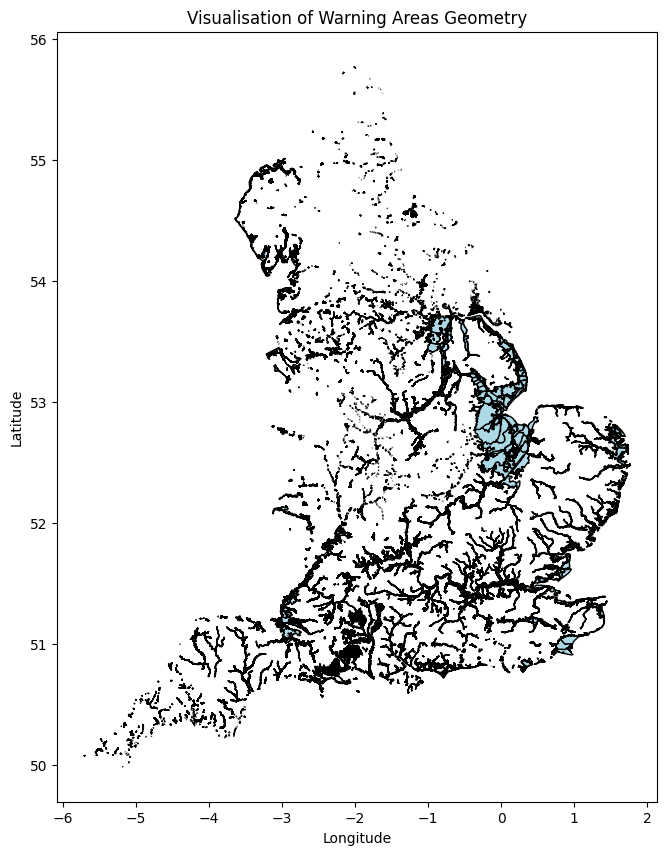

In [0]:
#Plot the geometry column directly.
warningareas.plot(figsize=(10, 10), edgecolor='black', facecolor='lightblue')
plt.title('Visualisation of Warning Areas Geometry')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [0]:
#Print the number of 'TA Codes' in the 'TA Code' column that are not in the 'fws_tacode' column in the warningareas dataset - an imperfect match caused by changes in the dataset over time. 
print((~warnings_df['TA Code'].drop_duplicates().isin(warningareas['fws_tacode'])).sum())

812


In [0]:
#Filter warnings_df to only include rows where the 'TA Code' value exists in warningareas['fws_tacode'] as there is an imperfect match. 
warnings_df = warnings_df[warnings_df['TA Code'].isin(warningareas['fws_tacode'])]
warnings_df

,TA Code,TA Name,TA Owner,Message Set Name,Message Type,Approved
56,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Issue Flood Warning EA,Flood Warning,2017-04-29 20:15:53.619
60,122FWC050,North Sea at Scarborough - Spa Complex,Yorkshire - North and East,122 Issue Flood Warning EA,Flood Warning,2017-04-30 12:21:02.330
63,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Update Flood Warning EA,Update Flood Warning,2017-04-30 12:43:17.533
75,122FWC050,North Sea at Scarborough - Spa Complex,Yorkshire - North and East,122 Remove Flood Warning EA,Remove Flood Warning,2017-05-01 09:28:15.139
82,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Remove Flood Warning EA,Remove Flood Warning,2017-05-01 12:14:18.567
...,...,...,...,...,...,...
77481,122FWF710,River Ouse at York - riverside properties,Yorkshire - North and East,122 Issue Flood Warning EA,Flood Warning,2025-01-14 16:05:10.462
77487,122FWF310,River Ure at Boroughbridge Camping and Caravan...,Yorkshire - North and East,122 Remove Flood Warning EA,Remove Flood Warning,2025-01-15 07:42:09.212
77504,122FWF710,River Ouse at York - riverside properties,Yorkshire - North and East,122 Remove Flood Warning EA,Remove Flood Warning,2025-01-16 09:08:45.088
77518,111FWFBRT110,"River Brit at Newtown, and Southgate Old Mill,...",Wessex - South,111 Issue Flood Warning RR EA,Flood Warning Rapid Response,2025-01-23 12:43:00.211


In [0]:
#Merge the two datasets on 'fws_tacode' and 'TA Code'.
warnings_df = warnings_df.merge(warningareas, left_on='TA Code', right_on='fws_tacode', how='inner')


In [0]:
warnings_df

,TA Code,TA Name,TA Owner,Message Set Name,Message Type,Approved,id,area,fws_tacode,ta_name,descrip,la_name,parent,qdial,river_sea,gdb_geomattr_data,geometry
0,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Issue Flood Warning EA,Flood Warning,2017-04-29 20:15:53.619,Flood_Warning_Areas.2529,Yorkshire,122FWC001,North Sea coast at Bridlington - Harbour Road ...,"The north side of the dock area, properties on...",East Riding of Yorkshire,122WAC954,130501,North Sea,None,"POLYGON ((-0.18764 54.08162, -0.18642 54.08334..."
1,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Update Flood Warning EA,Update Flood Warning,2017-04-30 12:43:17.533,Flood_Warning_Areas.2529,Yorkshire,122FWC001,North Sea coast at Bridlington - Harbour Road ...,"The north side of the dock area, properties on...",East Riding of Yorkshire,122WAC954,130501,North Sea,None,"POLYGON ((-0.18764 54.08162, -0.18642 54.08334..."
2,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Remove Flood Warning EA,Remove Flood Warning,2017-05-01 12:14:18.567,Flood_Warning_Areas.2529,Yorkshire,122FWC001,North Sea coast at Bridlington - Harbour Road ...,"The north side of the dock area, properties on...",East Riding of Yorkshire,122WAC954,130501,North Sea,None,"POLYGON ((-0.18764 54.08162, -0.18642 54.08334..."
3,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Issue Flood Warning EA,Flood Warning,2017-06-27 15:18:30.721,Flood_Warning_Areas.2529,Yorkshire,122FWC001,North Sea coast at Bridlington - Harbour Road ...,"The north side of the dock area, properties on...",East Riding of Yorkshire,122WAC954,130501,North Sea,None,"POLYGON ((-0.18764 54.08162, -0.18642 54.08334..."
4,122FWC001,North Sea Coast at Bridlington - Harbour Road ...,Yorkshire - North and East,122 Issue Flood Warning EA,Flood Warning,2017-06-28 12:44:24.859,Flood_Warning_Areas.2529,Yorkshire,122FWC001,North Sea coast at Bridlington - Harbour Road ...,"The north side of the dock area, properties on...",East Riding of Yorkshire,122WAC954,130501,North Sea,None,"POLYGON ((-0.18764 54.08162, -0.18642 54.08334..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20715,034FWFRERETFORD,Retford Beck at Retford,East Midlands,034 Remove Flood Warning EA,Remove Flood Warning,2025-01-07 07:44:17.499,Flood_Warning_Areas.520,East Midlands,034FWFRERETFORD,Retford Beck at Retford,"Retford Beck at Retford, including Grove Lane ...",Nottinghamshire,034WAF422,306242,Retford Beck,None,"MULTIPOLYGON (((-0.94026 53.32584, -0.94026 53..."
20716,034FWFWRASFRDBY,River Wreake at Asfordby,East Midlands,034 Issue Flood Warning EA,Flood Warning,2025-01-06 22:57:02.042,Flood_Warning_Areas.2187,East Midlands,034FWFWRASFRDBY,River Wreake at Asfordby,River Wreake at Asfordby including areas aroun...,Leicestershire,034WAF404,306195,River Wreake,None,"POLYGON ((-0.93662 52.76614, -0.93661 52.76614..."
20717,034FWFWRASFRDBY,River Wreake at Asfordby,East Midlands,034 Remove Flood Warning EA,Remove Flood Warning,2025-01-07 20:35:17.477,Flood_Warning_Areas.2187,East Midlands,034FWFWRASFRDBY,River Wreake at Asfordby,River Wreake at Asfordby including areas aroun...,Leicestershire,034WAF404,306195,River Wreake,None,"POLYGON ((-0.93662 52.76614, -0.93661 52.76614..."
20718,034FWFSOQUORN,River Soar at Quorn,East Midlands,034 Issue Flood Warning EA,Flood Warning,2025-01-07 04:21:26.720,Flood_Warning_Areas.3354,East Midlands,034FWFSOQUORN,River Soar at Quorn,River Soar at Quorn including Kye's Plantation...,Leicestershire,034WAF428,306129,River Soar,None,"POLYGON ((-1.16792 52.7417, -1.16794 52.74165,..."


In [0]:
#Filter out rows where 'id' is not 'Flood_Warning_Areas.761' (this area was identified using the geometry column and steps not included in this script to find the closest flood warning areas to my own postcode and then selecting the flood warning area with the greatest number of datapoints).
warnings_df = warnings_df[warnings_df['id'] == "Flood_Warning_Areas.761"]
warnings_df

,TA Code,TA Name,TA Owner,Message Set Name,Message Type,Approved,id,area,fws_tacode,ta_name,descrip,la_name,parent,qdial,river_sea,gdb_geomattr_data,geometry
13802,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2019-12-19 01:19:08.716,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13803,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2019-12-19 15:00:39.256,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13804,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2019-12-19 18:43:55.898,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13805,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2019-12-20 11:21:24.430,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13806,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-02-15 18:07:36.245,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13807,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2020-02-17 10:59:35.156,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13808,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-02-29 09:34:36.110,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13809,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2020-02-29 18:32:40.364,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13810,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-03-05 13:23:45.030,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13811,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warn

In [0]:
#Filter out rows where 'Message Type' contains the word "Update" as I only wanted the start and stop dates of the flood warning. 
warnings_df = warnings_df[~warnings_df['Message Type'].str.contains('Update', case=False, na=False)]
warnings_df



,TA Code,TA Name,TA Owner,Message Set Name,Message Type,Approved,id,area,fws_tacode,ta_name,descrip,la_name,parent,qdial,river_sea,gdb_geomattr_data,geometry
13802,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2019-12-19 01:19:08.716,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13803,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2019-12-19 15:00:39.256,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13804,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2019-12-19 18:43:55.898,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13805,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2019-12-20 11:21:24.430,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13806,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-02-15 18:07:36.245,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13807,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2020-02-17 10:59:35.156,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13808,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-02-29 09:34:36.110,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13809,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2020-02-29 18:32:40.364,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13810,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-03-05 13:23:45.030,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13811,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warn

In [0]:
#Change the 'Approved' column to datetime and to the nearest hour.
warnings_df = warnings_df.copy()
warnings_df["Approved"] = pd.to_datetime(warnings_df["Approved"], errors="coerce").dt.floor("H")
warnings_df

,TA Code,TA Name,TA Owner,Message Set Name,Message Type,Approved,id,area,fws_tacode,ta_name,descrip,la_name,parent,qdial,river_sea,gdb_geomattr_data,geometry
13802,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2019-12-19 01:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13803,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2019-12-19 15:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13804,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2019-12-19 18:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13805,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2019-12-20 11:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13806,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-02-15 18:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13807,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2020-02-17 10:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13808,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-02-29 09:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13809,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2020-02-29 18:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13810,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Issue Flood Warning EA,Flood Warning,2020-03-05 13:00:00,Flood_Warning_Areas.761,Wessex,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,None,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13811,112FWFPAR10A,River Parrett (upper) from South Perrott to Th...,Wessex - North,112 Remove Flood Warning EA,Remove Flood Warning,2020-03-05 20:00:00,Flood_Warnin

In [0]:
#Check the unique values in the 'Message Type' column.
warnings_df["Message Type"].unique()

array(['Flood Warning', 'Remove Flood Warning'], dtype=object)

In [0]:
#View the area description of the flood warning area.
print(warnings_df['descrip'].unique())

['South Perrott to Thorney including Gawbridge Mill and Farms around Town Tree Lane']


In [0]:
#Remove some columns as they are not needed or are duplicated.
warnings_df = warnings_df.drop(columns=['TA Name', 'TA Owner', 'Message Set Name', 'fws_tacode', 'gdb_geomattr_data'])

In [0]:
warnings_df

,TA Code,Message Type,Approved,id,area,ta_name,descrip,la_name,parent,qdial,river_sea,geometry
13802,112FWFPAR10A,Flood Warning,2019-12-19 01:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13803,112FWFPAR10A,Remove Flood Warning,2019-12-19 15:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13804,112FWFPAR10A,Flood Warning,2019-12-19 18:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13805,112FWFPAR10A,Remove Flood Warning,2019-12-20 11:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13806,112FWFPAR10A,Flood Warning,2020-02-15 18:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13807,112FWFPAR10A,Remove Flood Warning,2020-02-17 10:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13808,112FWFPAR10A,Flood Warning,2020-02-29 09:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13809,112FWFPAR10A,Remove Flood Warning,2020-02-29 18:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13810,112FWFPAR10A,Flood Warning,2020-03-05 13:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
13811,112FWFPAR10A,Remove Flood Warning,2020-03-05 20:00:00,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."


In [0]:
#Generate a full date range at hour frequency by making a new dataframe with a date range and then merging the original dataframe with this new dataframe. 
warnings_df = warnings_df.copy()
full_range = pd.date_range(warnings_df['Approved'].min(), warnings_df['Approved'].max(), freq='H')
full_dates = pd.DataFrame({'Approved': full_range})
warnings_df_filled = full_dates.merge(warnings_df, on='Approved', how='left')
warnings_df_filled

,Approved,TA Code,Message Type,id,area,ta_name,descrip,la_name,parent,qdial,river_sea,geometry
0,2019-12-19 01:00:00,112FWFPAR10A,Flood Warning,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0..."
1,2019-12-19 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2019-12-19 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2019-12-19 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2019-12-19 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
43278,2024-11-25 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
43279,2024-11-25 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
43280,2024-11-25 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
43281,2024-11-25 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [0]:
#Make a 'daily_indicator' column to indicate whether a flood warning is active or not.
warnings_df_filled['daily_indicator'] = warnings_df_filled['Message Type'].map({'Flood Warning': 1, 'Remove Flood Warning': 0})

In [0]:
#Forward fill the 'daily_indicator' column to fill in any gaps in the data.
warnings_df_filled['daily_indicator'] = warnings_df_filled['daily_indicator'].ffill()

In [0]:
warnings_df_filled

,Approved,TA Code,Message Type,id,area,ta_name,descrip,la_name,parent,qdial,river_sea,geometry,daily_indicator
0,2019-12-19 01:00:00,112FWFPAR10A,Flood Warning,Flood_Warning_Areas.761,Wessex,River Parrett (upper) from South Perrott to Th...,South Perrott to Thorney including Gawbridge M...,"Dorset Council, Somerset",112WAFTSSR,164028,River Parrett,"MULTIPOLYGON (((-2.8165 51.00103, -2.8165 51.0...",1.0
1,2019-12-19 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
2,2019-12-19 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
3,2019-12-19 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
4,2019-12-19 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43278,2024-11-25 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
43279,2024-11-25 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
43280,2024-11-25 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0
43281,2024-11-25 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.0


In [0]:
#Only keep the columns necessary for merging.
warnings_df_filled = warnings_df_filled[['Approved', 'daily_indicator']]
warnings_df_filled


,Approved,daily_indicator
0,2019-12-19 01:00:00,1.0
1,2019-12-19 02:00:00,1.0
2,2019-12-19 03:00:00,1.0
3,2019-12-19 04:00:00,1.0
4,2019-12-19 05:00:00,1.0
...,...,...
43278,2024-11-25 07:00:00,1.0
43279,2024-11-25 08:00:00,1.0
43280,2024-11-25 09:00:00,1.0
43281,2024-11-25 10:00:00,1.0


In [0]:

#Change the 'daily_indicator' column to an integer type.
warnings_df_filled = warnings_df_filled.copy()
warnings_df_filled['daily_indicator'] = warnings_df_filled['daily_indicator'].astype(int)



In [0]:
warnings_df_filled

,Approved,daily_indicator
0,2019-12-19 01:00:00,1
1,2019-12-19 02:00:00,1
2,2019-12-19 03:00:00,1
3,2019-12-19 04:00:00,1
4,2019-12-19 05:00:00,1
...,...,...
43278,2024-11-25 07:00:00,1
43279,2024-11-25 08:00:00,1
43280,2024-11-25 09:00:00,1
43281,2024-11-25 10:00:00,1


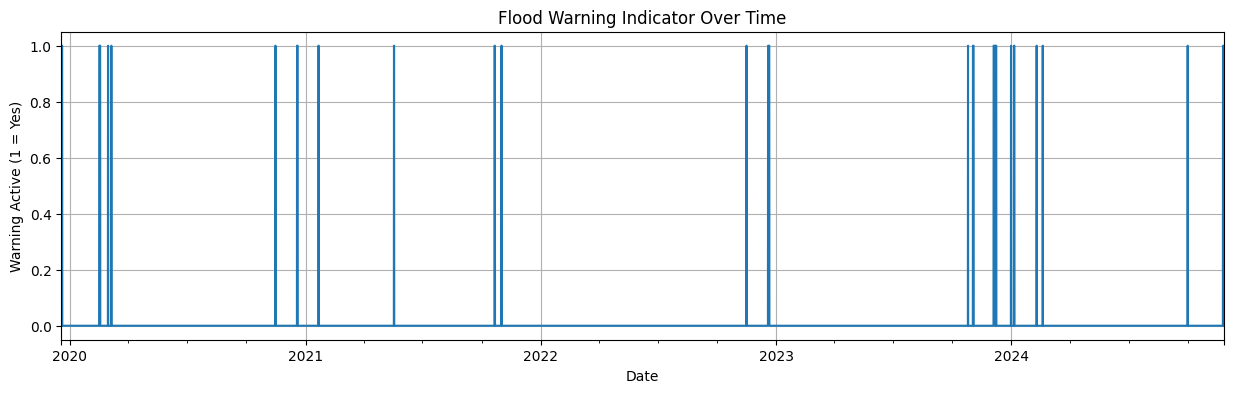

In [0]:
#Visualise flood warnings over time.
warnings_df_filled.set_index("Approved")["daily_indicator"].plot(figsize=(15, 4), title="Flood Warning Indicator Over Time")
plt.ylabel("Warning Active (1 = Yes)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [0]:
#Save the dataframe as a CSV file.
os.makedirs("Data", exist_ok=True)
warnings_df_filled.to_csv("Data/Warnings_Filled.csv", index=False)
print(f"CSV saved to {os.path.abspath('Data/Warnings_Filled.csv')}")

CSV saved to /Workspace/Users/luke.male@environment-agency.gov.uk/Reduced Scope Flooding Work/*** ML Flood Prediction/API Imports and Data/Flood Warning Predictor/Data/Warnings_Filled.csv
